<a href="https://colab.research.google.com/github/MattFr56/FML_Challenge_Sup/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

In [ ]:
#### Import of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy as sp
from scipy.stats import pearsonr,spearmanr


#### Allow to display all features in a row by using head()
pd.set_option('display.max_columns', 20)


In [ ]:
#### Make a list of all paths of the different csv files in "2113" folder.
def file_merging_2113():
    files_list_2113 = []
    for i in range(1, 10):
        files_list_2113.append(
            "/content/XML100_2113_0" + str(i) + ".csv")
    for i in range(10, 28):
        files_list_2113.append(
            "XML100_2113_" + str(i) + ".csv")
    return files_list_2113

def file_merging_2213():
    files_list_2213 = []
    for i in range(1, 10):
        files_list_2213.append(
            "/content/XML100_2213_0" + str(i) + ".csv")
    for i in range(10, 28):
        files_list_2213.append(
            "XML100_2213_" + str(i) + ".csv")
    return files_list_2213

def file_merging_3113():
    files_list_3113 = []
    for i in range(1, 10):
        files_list_3113.append(
            "/content/XML100_3113_0" + str(i) + ".csv")
    for i in range(10, 27):
        files_list_3113.append(
            "XML100_3113_" + str(i) + ".csv")
    return files_list_3113

def file_merging_3213():
    files_list_3213 = []
    for i in range(1, 10):
        files_list_3213.append(
            "/content/XML100_3213_0" + str(i) + ".csv")
    for i in range(10, 27):
        files_list_3213.append(
            "XML100_3213_" + str(i) + ".csv")
    return files_list_3213

In [ ]:
#### Loop allowing to read each csv file path and change column names.
ncols = ["instance_name","solution_cost","S1","S2","S3","S4","S5","S6","S7","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18"]

def make_df_2113():
    a = []
    for i in range(0, 27):
        a.append(pd.read_csv(file_merging_2113()[i], sep=";",names=ncols))
    return a

def make_df_2213():
    a = []
    for i in range(0, 27):
        a.append(pd.read_csv(file_merging_2213()[i], sep=";",names=ncols))
    return a
    
def make_df_3113():
    a = []
    for i in range(0, 26):
        a.append(pd.read_csv(file_merging_3113()[i], sep=";",names=ncols))
    return a

def make_df_3213():
    a = []
    for i in range(0, 26):
        a.append(pd.read_csv(file_merging_3213()[i], sep=";",names=ncols))
    return a

In [ ]:
#### Concatenation of all dataframes to one dataframe
df_2113 = pd.concat(make_df_2113())
df_2213 = pd.concat(make_df_2213())
df_3113 = pd.concat(make_df_3113())
df_3213 = pd.concat(make_df_3213())

# **Descriptive Statistics 2113**

In [ ]:
#### S7 column is an empty column and it will be remove
df_2113.describe()

,solution_cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2536722.0,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06
mean,1.383565e+04,2.259338e+02,9.456018e+01,2.135273e-01,1.185994e-01,4.969812e+02,1.341667e+02,0.0,3.133823e+02,2.686779e-01,1.551036e-01,4.970832e+02,2.718500e-01,1.359205e-01,8.139902e-02,3.212123e+02,4.620309e+02,1.367496e+00,3.303217e+00
std,8.422074e+02,2.759005e+01,2.292549e+01,3.659569e-02,5.823204e-02,2.322348e+01,2.760972e+01,0.0,2.875898e+01,2.678035e-02,1.630883e-02,5.168932e+01,5.757452e-02,2.878794e-02,9.373944e-02,6.924859e+01,1.837892e+01,8.385797e-01,3.799707e-01
min,1.181600e+04,1.310910e+02,1.350800e+01,1.012000e-01,1.770000e-02,4.050000e+02,4.789250e+01,0.0,2.094000e+02,1.831000e-01,9.870000e-02,2.459000e+02,2.000000e-01,1.000000e-01,0.000000e+00,7.813330e+01,3.869850e+02,0.000000e+00,2.083300e+00
25%,1.311500e+04,2.062710e+02,7.893090e+01,1.882000e-01,8.060000e-02,4.827690e+02,1.130800e+02,0.0,2.943000e+02,2.487000e-01,1.439000e-01,4.639170e+02,2.339000e-01,1.170000e-01,1.660000e-02,2.710890e+02,4.492100e+02,8.213000e-01,3.032100e+00
50%,1.402200e+04,2.226780e+02,9.345170e+01,2.086000e-01,1.030000e-01,4.953000e+02,1.365010e+02,0.0,3.141000e+02,2.697000e-01,1.554000e-01,4.972000e+02,2.639000e-01,1.319000e-01,3.330000e-02,3.265770e+02,4.635950e+02,1.433700e+00,3.286500e+00
75%,1.436800e+04,2.426300e+02,1.086120e+02,2.337000e-01,1.370000e-01,5.106670e+02,1.566600e+02,0.0,3.340910e+02,2.892000e-01,1.664000e-01,5.330000e+02,2.894000e-01,1.447000e-01,1.072000e-01,3.749970e+02,4.763190e+02,2.211100e+00,3.553500e+00
max,1.646600e+04,3.800300e+02,3.180630e+02,4.840000e-01,5.539000e-01,5.916000e+02,2.161280e+02,0.0,4.213000e+02,3.636000e-01,2.286000e-01,6.864620e+02,5.333000e-01,2.667000e-01,3.503000e-01,6.082430e+02,5.130430e+02,3.824700e+00,5.616100e+00


In [ ]:
#### Except instance names, all variables contain integers or floats
df_2113.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536722 entries, 0 to 152945
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   instance_name  object 
 1   solution_cost  int64  
 2   S1             float64
 3   S2             float64
 4   S3             float64
 5   S4             float64
 6   S5             float64
 7   S6             float64
 8   S7             int64  
 9   S8             float64
 10  S9             float64
 11  S10            float64
 12  S11            float64
 13  S12            float64
 14  S13            float64
 15  S14            float64
 16  S15            float64
 17  S16            float64
 18  S17            float64
 19  S18            float64
dtypes: float64(17), int64(2), object(1)
memory usage: 406.4+ MB


In [ ]:
#### At first sight, df does not get any empty value except S7 (full of 0 values)
df_2113.isnull().sum()

instance_name    0
solution_cost    0
S1               0
S2               0
S3               0
S4               0
S5               0
S6               0
S7               0
S8               0
S9               0
S10              0
S11              0
S12              0
S13              0
S14              0
S15              0
S16              0
S17              0
S18              0
dtype: int64

In [ ]:
#### remove of "S7" column due to an information reporting lag during genetic algorithm run
df1_2113 = df_2113.drop(["S7"],axis=1)

#### df1 shrinking to only include numerical features
df1_num_2113 = df1_2113.iloc[:,1:]

In [ ]:
print(df1_num_2113.head())

   solution_cost       S1        S2      S3      S4     S5        S6     S8  \
0          13063  257.768  105.0410  0.2078  0.0803  534.2  133.2030  294.4   
1          13237  201.777   57.7145  0.1561  0.0349  576.7   74.8466  302.6   
2          13168  225.720  114.3020  0.1653  0.0572  552.8  112.2280  279.4   
3          13168  243.308  164.7820  0.2140  0.1242  539.6  157.2250  297.6   
4          13000  195.334  102.7790  0.1588  0.1049  563.7   79.7384  294.2   

       S9     S10    S11     S12     S13     S14      S15      S16     S17  \
0  0.2274  0.1524  446.5  0.2066  0.1033  0.0207  327.901  482.077  1.6125   
1  0.2275  0.1691  420.3  0.2113  0.1057  0.0321  187.524  489.225  1.7889   
2  0.2105  0.1649  430.8  0.2062  0.1031  0.0202  307.325  484.538  1.5492   
3  0.2452  0.1512  432.2  0.3636  0.1818  0.2727  403.127  467.493  3.0000   
4  0.2256  0.1720  416.4  0.2074  0.1037  0.0233  213.558  490.165  1.6125   

      S18  
0  3.5971  
1  4.1107  
2  3.7572  
3  3.515

In [ ]:
#### Data standardization in order to better compare each feature 
from sklearn import preprocessing
stand = preprocessing.StandardScaler().fit(df1_num_2113).transform(df1_num_2113)
df1_nor_2113 = pd.DataFrame(stand, columns=["solution_cost","S1","S2","S3","S4","S5","S6","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18"])

In [ ]:
df1_nor_2113.shape

(2536722, 18)

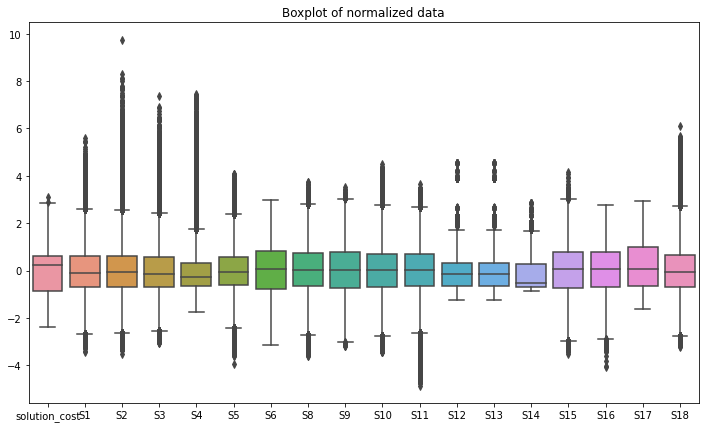

In [ ]:
#### We observe quite a few outliers in almost all of df1_num_1's features
def boxplot_display(data):
    plt.figure(figsize=(12,7))
    plt.title("Boxplot of normalized data")
    sns.boxplot(data=data)
    plt.show()

boxplot_display(df1_nor_2113)

In [ ]:
#### Outliers removing function
def out_remov(data):
  for x in ["solution_cost","S1","S2","S3","S4","S5","S6","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan
    data.dropna(axis = 0, inplace = True)
  
out_remov(df1_nor_2113) 

In [ ]:
#### 40 percent of our data has been removed
print("df1_num shape :",df1_num_2113.shape, "\n\n", "df1_num_1 shape :",df1_nor_2113.shape,"\n\n","Percentage of remaining data after removing outliers :",(df1_nor_2113.shape[0]/ df1_num_2113.shape[0])*100)

df1_num shape : (2536722, 18) 

 df1_num_1 shape : (1483521, 18) 

 Percentage of remaining data after removing outliers : 58.481812354684514


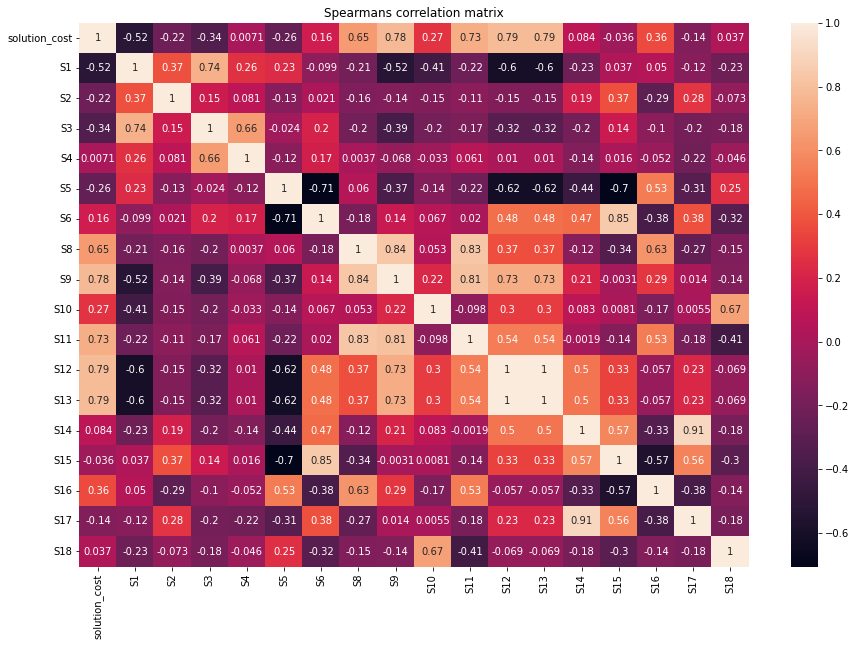

In [ ]:
#### Correlation matrix 

def correlation_matrix():
    df1_corr = df1_nor_2113.corr(method='spearman')
    plt.figure(figsize=(15,10))
    plt.title("Spearmans correlation matrix")
    sns.heatmap(data=df1_corr,annot=True)
    plt.show()

correlation_matrix()


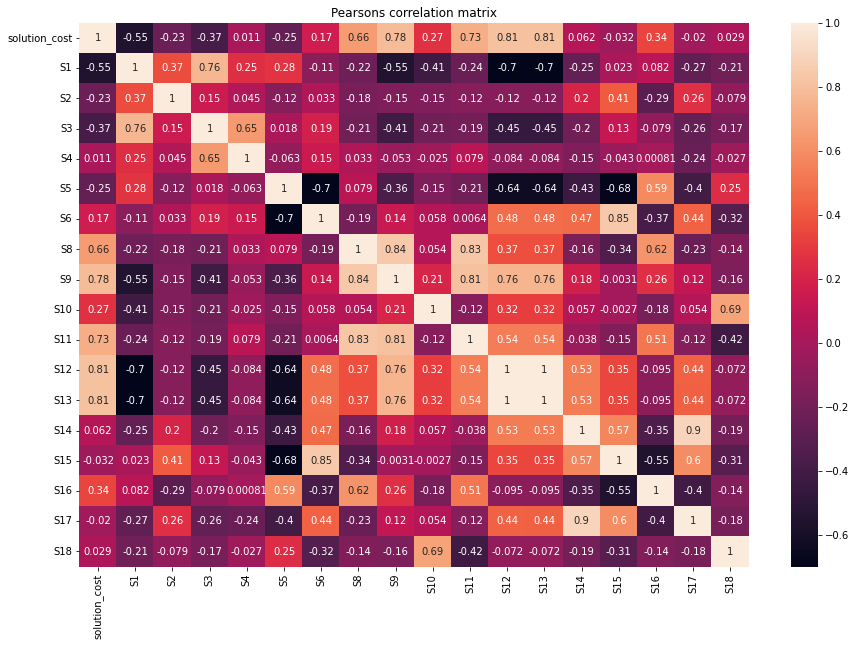

In [ ]:
def correlation_matrix():
    df1_corr = df1_nor_2113.corr(method='pearson')
    plt.figure(figsize=(15,10))
    plt.title("Pearsons correlation matrix")
    sns.heatmap(data=df1_corr,annot=True)
    plt.show()

correlation_matrix()


# **Descriptive Statistics 2213**

In [ ]:
df_2213.describe()

,solution_cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3302699.0,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06
mean,1.073829e+04,1.372737e+02,8.634914e+01,1.458151e-01,1.131446e-01,4.213288e+02,1.253106e+02,0.0,3.109957e+02,3.247369e-01,1.302215e-01,5.364218e+02,2.719455e-01,1.359677e-01,9.165772e-02,2.975915e+02,3.321542e+02,1.485339e+00,4.009757e+00
std,1.414708e+03,3.407150e+01,3.061812e+01,5.129944e-02,6.264568e-02,5.648133e+01,3.426555e+01,0.0,5.598335e+01,3.459650e-02,2.457457e-02,1.163529e+02,6.099996e-02,3.049957e-02,1.015679e-01,7.510458e+01,8.264542e+01,1.003530e+00,5.770904e-01
min,7.766000e+03,5.917320e+01,1.988140e+01,4.040000e-02,1.770000e-02,2.968000e+02,4.596100e+01,0.0,1.580000e+02,2.079000e-01,6.020000e-02,1.880000e+02,2.000000e-01,1.000000e-01,0.000000e+00,8.678280e+01,1.172220e+02,0.000000e+00,2.280000e+00
25%,9.804000e+03,1.113980e+02,6.344150e+01,1.117000e-01,6.930000e-02,3.716670e+02,1.038680e+02,0.0,2.667500e+02,3.020000e-01,1.107000e-01,4.477500e+02,2.191000e-01,1.095000e-01,1.550000e-02,2.422400e+02,2.657660e+02,8.213000e-01,3.585000e+00
50%,1.068000e+04,1.300310e+02,7.888780e+01,1.373000e-01,9.410000e-02,4.350000e+02,1.175870e+02,0.0,3.067000e+02,3.245000e-01,1.308000e-01,5.224000e+02,2.643000e-01,1.321000e-01,3.330000e-02,2.805980e+02,3.348650e+02,1.612500e+00,3.938900e+00
75%,1.191000e+04,1.615180e+02,1.060310e+02,1.767000e-01,1.508000e-01,4.596000e+02,1.493030e+02,0.0,3.514620e+02,3.463000e-01,1.465000e-01,6.200000e+02,2.983000e-01,1.492000e-01,1.225000e-01,3.542280e+02,3.928910e+02,2.211100e+00,4.350400e+00
max,1.505000e+04,3.805150e+02,3.313820e+02,4.531000e-01,5.700000e-01,5.617000e+02,2.204030e+02,0.0,5.149000e+02,4.384000e-01,2.534000e-01,8.217000e+02,5.333000e-01,2.667000e-01,3.503000e-01,5.973350e+02,5.088730e+02,3.824700e+00,8.561100e+00


In [ ]:
df_2213.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3302699 entries, 0 to 93182
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   instance_name  object 
 1   solution_cost  int64  
 2   S1             float64
 3   S2             float64
 4   S3             float64
 5   S4             float64
 6   S5             float64
 7   S6             float64
 8   S7             int64  
 9   S8             float64
 10  S9             float64
 11  S10            float64
 12  S11            float64
 13  S12            float64
 14  S13            float64
 15  S14            float64
 16  S15            float64
 17  S16            float64
 18  S17            float64
 19  S18            float64
dtypes: float64(17), int64(2), object(1)
memory usage: 529.1+ MB


In [ ]:
df_2213.isnull().sum()

instance_name    0
solution_cost    0
S1               0
S2               0
S3               0
S4               0
S5               0
S6               0
S7               0
S8               0
S9               0
S10              0
S11              0
S12              0
S13              0
S14              0
S15              0
S16              0
S17              0
S18              0
dtype: int64

In [ ]:
#### remove of "S7" column due to an information reporting lag during genetic algorithm run
df1_2213 = df_2213.drop(["S7"],axis=1)

#### df1 shrinking to only include numerical features
df1_num_2213 = df1_2213.iloc[:,1:]

In [ ]:
df1_num_2213.head()

,solution_cost,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,12631,177.332,151.6830,0.1595,0.1951,448.667,100.1710,339.750,0.3324,0.1427,580.333,0.2639,0.1319,0.0609,293.076,388.511,1.6499,4.1027
1,13077,139.027,87.2691,0.1975,0.3319,464.500,89.4907,377.750,0.3434,0.1486,596.833,0.2486,0.1243,0.0275,360.272,388.270,1.3123,4.1524
2,12704,105.298,43.4592,0.1354,0.1814,467.250,84.1022,366.333,0.3469,0.1485,591.250,0.2639,0.1319,0.0609,294.291,397.296,1.6499,3.9658
3,13089,182.503,147.4230,0.2094,0.3217,449.667,98.6250,393.167,0.3593,0.1582,595.583,0.2444,0.1222,0.0178,427.137,376.634,1.0274,3.9811
4,12987,119.682,99.9362,0.0968,0.1068,449.692,101.3650,335.692,0.3524,0.1168,577.231,0.4231,0.2115,0.2497,267.279,388.247,2.6713,3.6566


In [ ]:
#### Data standardization in order to better compare each feature 
from sklearn import preprocessing
stand = preprocessing.StandardScaler().fit(df1_num_2213).transform(df1_num_2213)
df1_nor_2213 = pd.DataFrame(stand, columns=["solution_cost","S1","S2","S3","S4","S5","S6","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18"])

In [ ]:
df1_nor_2213.shape

(3302699, 18)

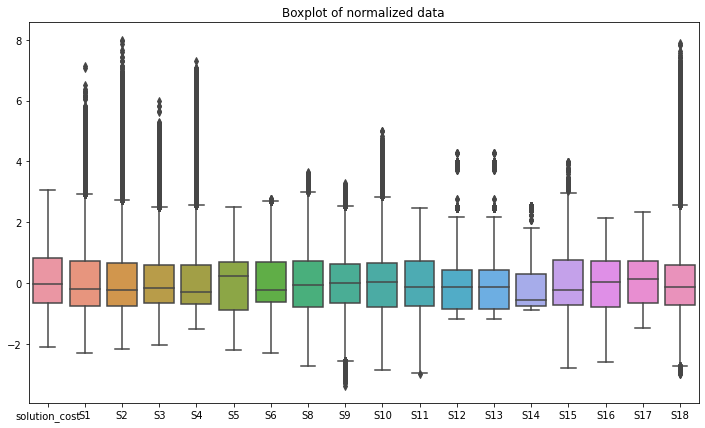

In [ ]:
#### We observe quite a few outliers in almost all of df1_nor_2213's features
def boxplot_display(data):
    plt.figure(figsize=(12,7))
    plt.title("Boxplot of normalized data")
    sns.boxplot(data=data)
    plt.show()

boxplot_display(df1_nor_2213)

In [ ]:
#### Outliers removing function
def out_remov(data):
  for x in ["solution_cost","S1","S2","S3","S4","S5","S6","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan
    data.dropna(axis = 0, inplace = True)
  
out_remov(df1_nor_2213) 

In [ ]:
#### 40 percent of our data has been removed
print("df1_num_2213 shape :",df1_num_2213.shape, "\n\n", "df1_nor_2213 shape :",df1_nor_2213.shape,"\n\n","Percentage of remaining data after removing outliers :",(df1_nor_2213.shape[0]/ df1_num_2213.shape[0])*100)

df1_num_2213 shape : (3302699, 18) 

 df1_nor_2213 shape : (3028780, 18) 

 Percentage of remaining data after removing outliers : 91.70620755933253


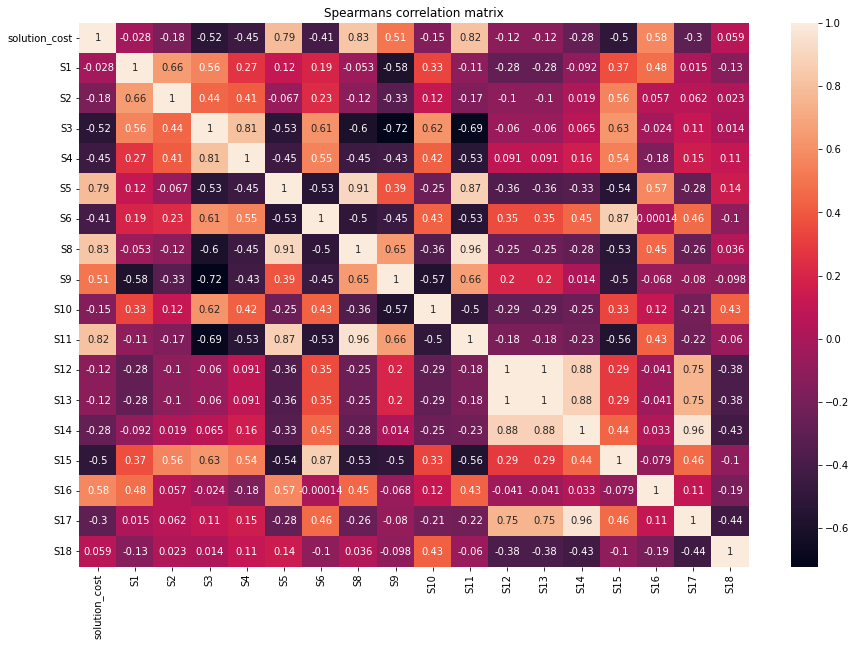

In [ ]:
#### Correlation matrix 

def correlation_matrix():
    df1_corr = df1_nor_2213.corr(method='spearman')
    plt.figure(figsize=(15,10))
    plt.title("Spearmans correlation matrix")
    sns.heatmap(data=df1_corr,annot=True)
    plt.show()

correlation_matrix()


# **Descriptive Statistics 3113**

In [ ]:
df_3113.describe()

,solution_cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4137693.0,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06
mean,2.175919e+04,2.028789e+02,9.533067e+01,9.341820e-02,6.051979e-02,8.715416e+02,3.113764e+02,0.0,6.345070e+02,3.348486e-01,1.106162e-01,1.136914e+03,3.212560e-01,1.606260e-01,1.692875e-01,6.710729e+02,4.895648e+02,1.888267e+00,3.767524e+00
std,1.991921e+03,2.532028e+01,2.284763e+01,1.465029e-02,2.225223e-02,4.533718e+01,3.597679e+01,0.0,5.222232e+01,2.101679e-02,1.447097e-02,9.660147e+01,6.271364e-02,3.135866e-02,1.114096e-01,8.276526e+01,1.783896e+01,9.311514e-01,5.318735e-01
min,1.807700e+04,1.069430e+02,1.799330e+01,4.390000e-02,7.300000e-03,7.700000e+02,1.400660e+02,0.0,4.256000e+02,2.450000e-01,6.250000e-02,7.061000e+02,2.000000e-01,1.000000e-01,0.000000e+00,3.359490e+02,3.999430e+02,0.000000e+00,2.100000e+00
25%,2.048900e+04,1.851180e+02,7.973240e+01,8.280000e-02,4.410000e-02,8.392000e+02,2.911680e+02,0.0,5.998330e+02,3.193000e-01,1.005000e-01,1.081580e+03,2.692000e-01,1.346000e-01,3.330000e-02,6.185070e+02,4.740950e+02,1.065900e+00,3.390600e+00
50%,2.181900e+04,2.006040e+02,9.325850e+01,9.270000e-02,5.540000e-02,8.628000e+02,3.169430e+02,0.0,6.342500e+02,3.375000e-01,1.093000e-01,1.142170e+03,3.636000e-01,1.818000e-01,2.457000e-01,6.838060e+02,4.922140e+02,2.211100e+00,3.724000e+00
75%,2.272500e+04,2.184260e+02,1.082730e+02,1.030000e-01,7.490000e-02,8.941540e+02,3.363320e+02,0.0,6.749170e+02,3.506000e-01,1.194000e-01,1.207380e+03,3.704000e-01,1.852000e-01,2.457000e-01,7.238090e+02,5.022730e+02,2.211100e+00,4.095500e+00
max,2.648200e+04,4.151350e+02,3.764310e+02,2.211000e-01,2.262000e-01,1.082100e+03,4.111880e+02,0.0,8.037000e+02,4.057000e-01,2.027000e-01,1.392850e+03,3.704000e-01,1.852000e-01,2.727000e-01,9.582020e+02,5.448200e+02,3.000000e+00,8.844400e+00


In [ ]:
df_3113.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4137693 entries, 0 to 167789
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   instance_name  object 
 1   solution_cost  int64  
 2   S1             float64
 3   S2             float64
 4   S3             float64
 5   S4             float64
 6   S5             float64
 7   S6             float64
 8   S7             int64  
 9   S8             float64
 10  S9             float64
 11  S10            float64
 12  S11            float64
 13  S12            float64
 14  S13            float64
 15  S14            float64
 16  S15            float64
 17  S16            float64
 18  S17            float64
 19  S18            float64
dtypes: float64(17), int64(2), object(1)
memory usage: 662.9+ MB


In [ ]:
df_3113.isnull().sum()

instance_name    0
solution_cost    0
S1               0
S2               0
S3               0
S4               0
S5               0
S6               0
S7               0
S8               0
S9               0
S10              0
S11              0
S12              0
S13              0
S14              0
S15              0
S16              0
S17              0
S18              0
dtype: int64

In [ ]:
#### remove of "S7" column due to an information reporting lag during genetic algorithm run
df1_3113 = df_3113.drop(["S7"],axis=1)

#### df1 shrinking to only include numerical features
df1_num_3113 = df1_3113.iloc[:,1:]

In [ ]:
df1_num_3113.head()

,solution_cost,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,25583,192.706,93.5708,0.0869,0.0534,919.538,267.955,712.154,0.3559,0.1421,1207.08,0.2619,0.1310,0.0121,566.015,471.008,0.6057,5.1718
1,25562,150.776,69.2221,0.0744,0.0446,938.846,271.543,685.385,0.3405,0.1393,1167.08,0.2692,0.1346,0.0333,566.737,477.137,1.0659,5.9176
2,25604,214.452,174.8470,0.0899,0.0524,905.846,279.545,750.846,0.3772,0.1569,1214.69,0.2619,0.1310,0.0121,653.603,464.373,0.6057,5.0352
3,25376,153.457,79.1615,0.0658,0.0388,928.231,268.949,690.846,0.3475,0.1517,1162.15,0.2628,0.1314,0.0150,564.766,471.981,0.7216,5.6143
4,25532,164.529,74.7683,0.0860,0.0662,931.538,283.948,692.385,0.3497,0.1405,1195.62,0.2643,0.1321,0.0202,589.663,472.957,0.8213,5.2788


In [ ]:
#### Data standardization in order to better compare each feature 
from sklearn import preprocessing
stand = preprocessing.StandardScaler().fit(df1_num_3113).transform(df1_num_3113)
df1_nor_3113 = pd.DataFrame(stand, columns=["solution_cost","S1","S2","S3","S4","S5","S6","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18"])

In [ ]:
df1_nor_3113.shape

(4137693, 18)

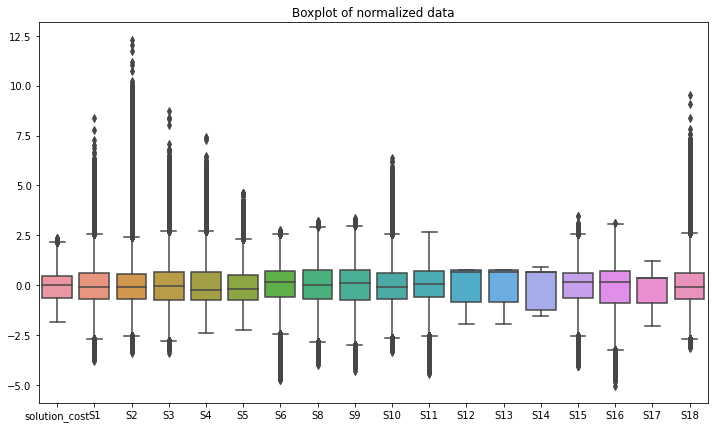

In [ ]:
#### We observe quite a few outliers in almost all of df1_num_1's features
def boxplot_display(data):
    plt.figure(figsize=(12,7))
    plt.title("Boxplot of normalized data")
    sns.boxplot(data=data)
    plt.show()

boxplot_display(df1_nor_3113)

In [ ]:
#### Outliers removing function
def out_remov(data):
  for x in ["solution_cost","S1","S2","S3","S4","S5","S6","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan
    data.dropna(axis = 0, inplace = True)
  
out_remov(df1_nor_3113) 

In [ ]:
#### About 13 percent of our data has been removed
print("df1_num_3113 shape :",df1_num_3113.shape, "\n\n", "df1_nor_3113 shape :",df1_nor_3113.shape,"\n\n","Percentage of remaining data after removing outliers :",(df1_nor_3113.shape[0]/ df1_num_3113.shape[0])*100)

df1_num_3113 shape : (4137693, 18) 

 df1_nor_3113 shape : (3590885, 18) 

 Percentage of remaining data after removing outliers : 86.7847131239558


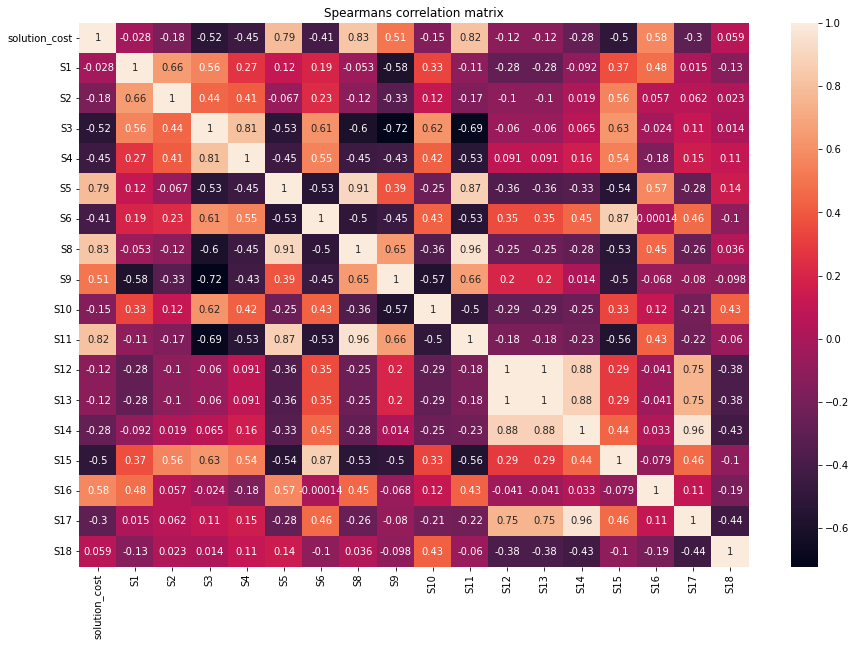

In [ ]:
#### Correlation matrix 

def correlation_matrix():
    df1_corr = df1_nor_2213.corr(method='spearman')
    plt.figure(figsize=(15,10))
    plt.title("Spearmans correlation matrix")
    sns.heatmap(data=df1_corr,annot=True)
    plt.show()

correlation_matrix()


# **Descriptive Statistics 3213**

In [ ]:
df_3213.describe()

,solution_cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4132400.0,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06
mean,1.999346e+04,1.320380e+02,9.000354e+01,5.504277e-02,3.900560e-02,8.356010e+02,2.192106e+02,0.0,7.059436e+02,3.985144e-01,8.121530e-02,1.314749e+03,2.976809e-01,1.488366e-01,1.324379e-01,4.808405e+02,3.699737e+02,1.807382e+00,4.453170e+00
std,3.379610e+03,3.152291e+01,3.391581e+01,1.635940e-02,1.829580e-02,1.296117e+02,9.358354e+01,0.0,1.323455e+02,2.918490e-02,2.643881e-02,2.642881e+02,6.631182e-02,3.315633e-02,1.118187e-01,1.861478e+02,1.023027e+02,9.128615e-01,6.878613e-01
min,1.161500e+04,5.332490e+01,1.762830e+01,1.790000e-02,3.500000e-03,4.877270e+02,5.608920e+01,0.0,3.611820e+02,3.024000e-01,3.130000e-02,6.179170e+02,2.000000e-01,1.000000e-01,0.000000e+00,1.296500e+02,1.334920e+02,0.000000e+00,2.321400e+00
25%,1.720800e+04,1.091680e+02,6.405680e+01,4.370000e-02,2.580000e-02,7.778460e+02,1.392130e+02,0.0,6.562500e+02,3.731000e-01,6.230000e-02,1.204920e+03,2.444000e-01,1.222000e-01,2.560000e-02,3.332420e+02,3.155990e+02,1.065900e+00,3.955000e+00
50%,2.036800e+04,1.336220e+02,8.401930e+01,5.530000e-02,3.600000e-02,8.635380e+02,2.114230e+02,0.0,7.319000e+02,3.988000e-01,7.860000e-02,1.355300e+03,2.692000e-01,1.346000e-01,1.072000e-01,4.773045e+02,3.763700e+02,2.108600e+00,4.377300e+00
75%,2.256600e+04,1.543540e+02,1.124180e+02,6.480000e-02,4.810000e-02,9.276000e+02,2.914100e+02,0.0,7.875830e+02,4.195000e-01,9.440000e-02,1.476900e+03,3.657000e-01,1.828000e-01,2.457000e-01,6.349270e+02,4.536340e+02,2.366400e+00,4.890600e+00
max,2.758800e+04,3.495290e+02,3.789620e+02,1.843000e-01,2.294000e-01,1.099200e+03,4.305820e+02,0.0,9.790830e+02,4.654000e-01,2.514000e-01,1.856000e+03,5.333000e-01,2.667000e-01,3.503000e-01,9.045720e+02,5.466440e+02,3.824700e+00,9.945000e+00


In [ ]:
df_3213.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132400 entries, 0 to 139033
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   instance_name  object 
 1   solution_cost  int64  
 2   S1             float64
 3   S2             float64
 4   S3             float64
 5   S4             float64
 6   S5             float64
 7   S6             float64
 8   S7             int64  
 9   S8             float64
 10  S9             float64
 11  S10            float64
 12  S11            float64
 13  S12            float64
 14  S13            float64
 15  S14            float64
 16  S15            float64
 17  S16            float64
 18  S17            float64
 19  S18            float64
dtypes: float64(17), int64(2), object(1)
memory usage: 662.1+ MB


In [ ]:
df_3213.isnull().sum()

instance_name    0
solution_cost    0
S1               0
S2               0
S3               0
S4               0
S5               0
S6               0
S7               0
S8               0
S9               0
S10              0
S11              0
S12              0
S13              0
S14              0
S15              0
S16              0
S17              0
S18              0
dtype: int64

In [ ]:
#### remove of "S7" column due to an information reporting lag during genetic algorithm run
df1_3213 = df_3213.drop(["S7"],axis=1)

#### df1 shrinking to only include numerical features
df1_num_3213 = df1_3213.iloc[:,1:]

In [ ]:
df1_num_3213.head()

,solution_cost,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,22793,136.101,93.2145,0.0566,0.0419,987.636,342.830,847.909,0.3881,0.1454,1421.36,0.3657,0.1828,0.2584,696.380,506.898,2.5745,5.2841
1,22504,180.084,110.4310,0.0712,0.0528,1055.800,296.176,902.200,0.3873,0.1777,1358.10,0.2000,0.1000,0.0000,613.798,462.556,0.0000,6.7722
2,21594,233.753,189.6580,0.0967,0.0878,986.200,361.022,818.400,0.3592,0.1083,1472.60,0.2000,0.1000,0.0000,753.834,484.767,0.0000,5.5556
3,22866,107.146,45.6872,0.0567,0.0560,1002.450,340.854,826.818,0.3789,0.1060,1483.09,0.3657,0.1828,0.2584,682.954,516.207,2.5745,5.0379
4,22756,150.963,97.8176,0.0596,0.0459,976.273,339.827,834.636,0.3861,0.1338,1427.09,0.3657,0.1828,0.2584,697.418,507.348,2.5745,5.0360


In [ ]:
#### Data standardization in order to better compare each feature 
from sklearn import preprocessing
stand = preprocessing.StandardScaler().fit(df1_num_3213).transform(df1_num_3213)
df1_nor_3213 = pd.DataFrame(stand, columns=["solution_cost","S1","S2","S3","S4","S5","S6","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18"])

In [ ]:
df1_nor_3213.shape

(4132400, 18)

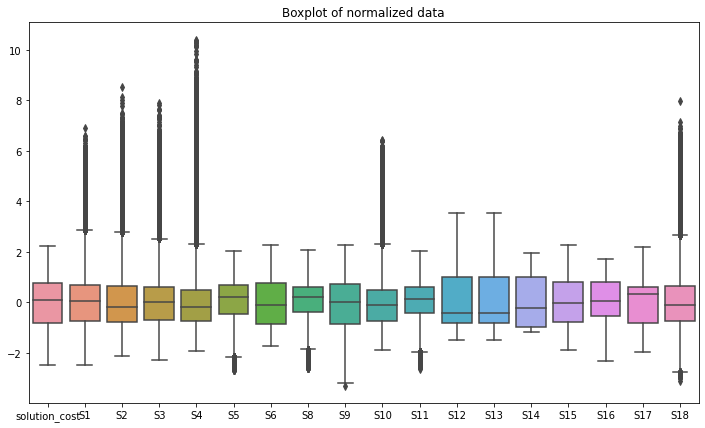

In [ ]:
#### We observe quite a few outliers in almost all of df1_num_1's features
def boxplot_display(data):
    plt.figure(figsize=(12,7))
    plt.title("Boxplot of normalized data")
    sns.boxplot(data=data)
    plt.show()

boxplot_display(df1_nor_3213)

In [ ]:
#### Outliers removing function
def out_remov(data):
  for x in ["solution_cost","S1","S2","S3","S4","S5","S6","S8","S9","S10","S11","S12","S13","S14","S15","S16","S17","S18"]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan
    data.dropna(axis = 0, inplace = True)
  
out_remov(df1_nor_3213) 

In [ ]:
#### About 13 percent of our data has been removed
print("df1_num_3213 shape :",df1_num_3213.shape, "\n\n", "df1_nor_3113 shape :",df1_nor_3213.shape,"\n\n","Percentage of remaining data after removing outliers :",(df1_nor_3213.shape[0]/ df1_num_3213.shape[0])*100)

df1_num_3213 shape : (4132400, 18) 

 df1_nor_3113 shape : (3494891, 18) 

 Percentage of remaining data after removing outliers : 84.57291162520569


# **Model 2113**

In [ ]:
#### Split the data into train and test set
from sklearn.model_selection import train_test_split
X = df1_nor_2113.iloc[:,1:]
y = df1_nor_2113.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(1038464, 17) (445057, 17) (1038464,) (445057,)


In [ ]:
#### XGBoost regressor as regression algorithm
#### We have chosen to use RMSE, R2 and MAE as regression metrics to assess our model
#### We have set up model's settings to get the best model ever by paying attention to overfitting 
#### As a matter of fact, we have increased max_depth up to 10 and n_estimators up to 1000 
#### However, we observed that both our model's performances and overfitting have enhanced   


from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor

xgb_clf_1 = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators=200, max_depth=5, eta=0.01)
xgb_clf_1.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5, verbose=False)
Y_pred = xgb_clf_1.predict(X_test)

from sklearn.metrics import mean_squared_log_error
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred))
R2 = r2_score(y_test, Y_pred)
MAE = mean_absolute_error(y_test, Y_pred)
print("The RMSE is %.5f" % RMSE )
print("The R2 is %.5f" % R2 )
print("The MAE is %.5f" % MAE )
print('Training set score: {:.5f}'.format(xgb_clf_1.score(X_train, y_train)))

print('Testing set score: {:.5f}'.format(xgb_clf_1.score(X_test, y_test)))



The RMSE is 0.09012
The R2 is 0.99253
The MAE is 0.06959
Training set score: 0.99270
Testing set score: 0.99253


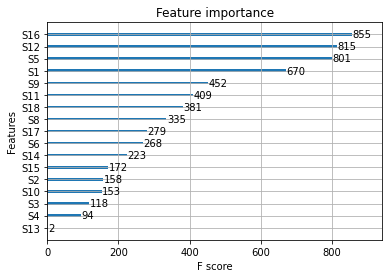

In [ ]:
#### 
xgb.plot_importance(xgb_clf_1)

# **Model 2213**

In [ ]:
#### Split the data into train and test set
from sklearn.model_selection import train_test_split
X = df1_nor_2213.iloc[:,1:]
y = df1_nor_2213.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(2120146, 17) (908634, 17) (2120146,) (908634,)


In [ ]:
#### XGBoost regressor as regression algorithm
#### We have chosen to use RMSE, R2 and MAE as regression metrics to assess our model
#### We have set up model's settings to get the best model ever by paying attention to overfitting 
#### As a matter of fact, we have increased max_depth up to 10 and n_estimators up to 1000 
#### However, we observed that both our model's performances and overfitting have enhanced   


from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor

xgb_clf_1 = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators=200, max_depth=5, eta=0.01)
xgb_clf_1.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5, verbose=False)
Y_pred = xgb_clf_1.predict(X_test)

from sklearn.metrics import mean_squared_log_error
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred))
R2 = r2_score(y_test, Y_pred)
MAE = mean_absolute_error(y_test, Y_pred)
print("The RMSE is %.5f" % RMSE )
print("The R2 is %.5f" % R2 )
print("The MAE is %.5f" % MAE )
print('Training set score: {:.5f}'.format(xgb_clf_1.score(X_train, y_train)))

print('Testing set score: {:.5f}'.format(xgb_clf_1.score(X_test, y_test)))



The RMSE is 0.04862
The R2 is 0.99762
The MAE is 0.03315
Training set score: 0.99767
Testing set score: 0.99762


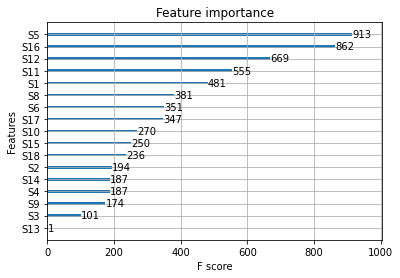

In [ ]:
#### 
xgb.plot_importance(xgb_clf_1)

# **Model 3113**

In [ ]:
#### Split the data into train and test set
from sklearn.model_selection import train_test_split
X = df1_nor_3113.iloc[:,1:]
y = df1_nor_3113.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(2513619, 17) (1077266, 17) (2513619,) (1077266,)


In [ ]:
#### XGBoost regressor as regression algorithm
#### We have chosen to use RMSE, R2 and MAE as regression metrics to assess our model
#### We have set up model's settings to get the best model ever by paying attention to overfitting 
#### As a matter of fact, we have increased max_depth up to 10 and n_estimators up to 1000 
#### However, we observed that both our model's performances and overfitting have enhanced   


from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor

xgb_clf_1 = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators=200, max_depth=5, eta=0.01)
xgb_clf_1.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5, verbose=False)
Y_pred = xgb_clf_1.predict(X_test)

from sklearn.metrics import mean_squared_log_error
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred))
R2 = r2_score(y_test, Y_pred)
MAE = mean_absolute_error(y_test, Y_pred)
print("The RMSE is %.5f" % RMSE )
print("The R2 is %.5f" % R2 )
print("The MAE is %.5f" % MAE )
print('Training set score: {:.5f}'.format(xgb_clf_1.score(X_train, y_train)))

print('Testing set score: {:.5f}'.format(xgb_clf_1.score(X_test, y_test)))



The RMSE is 0.04258
The R2 is 0.99818
The MAE is 0.03321
Training set score: 0.99820
Testing set score: 0.99818


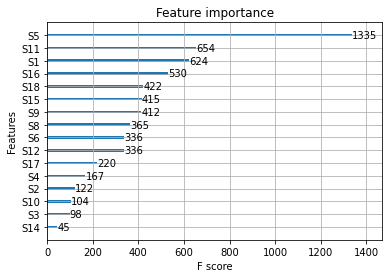

In [ ]:
#### 
xgb.plot_importance(xgb_clf_1)

# **Model 3213**

In [ ]:
#### Split the data into train and test set
from sklearn.model_selection import train_test_split
X = df1_nor_3213.iloc[:,1:]
y = df1_nor_3213.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(2446423, 17) (1048468, 17) (2446423,) (1048468,)


In [ ]:
#### XGBoost regressor as regression algorithm
#### We have chosen to use RMSE, R2 and MAE as regression metrics to assess our model
#### We have set up model's settings to get the best model ever by paying attention to overfitting 
#### As a matter of fact, we have increased max_depth up to 10 and n_estimators up to 1000 
#### However, we observed that both our model's performances and overfitting have enhanced   


from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor

xgb_clf_1 = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators=200, max_depth=5, eta=0.01)
xgb_clf_1.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5, verbose=False)
Y_pred = xgb_clf_1.predict(X_test)

from sklearn.metrics import mean_squared_log_error
RMSE = np.sqrt(mean_squared_error(y_test, Y_pred))
R2 = r2_score(y_test, Y_pred)
MAE = mean_absolute_error(y_test, Y_pred)
print("The RMSE is %.5f" % RMSE )
print("The R2 is %.5f" % R2 )
print("The MAE is %.5f" % MAE )
print('Training set score: {:.5f}'.format(xgb_clf_1.score(X_train, y_train)))

print('Testing set score: {:.5f}'.format(xgb_clf_1.score(X_test, y_test)))



The RMSE is 0.02768
The R2 is 0.99883
The MAE is 0.01775
Training set score: 0.99887
Testing set score: 0.99883


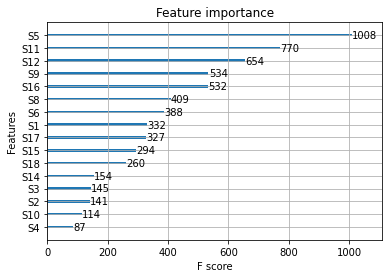

In [ ]:
#### 
xgb.plot_importance(xgb_clf_1)